In [347]:
#Erez Sarousi
#Professor Werner
#DSC550 Data Mining
#Bellevue University
#4/27/2021

In [577]:
#Explanation of project and graphs.
M2 = (open("Milestone2.txt", "r")).read()
print(M2)

There are many columns that was in the original dataset that I felt was not necessary for this data mining project. The columns that I dropped was the image url, the url to the review, the price purchased, the name of the reviewer and other review from a duplicate rating, because they are simply not necessary for sentiment analysis. They do not reference anything about the phone features.

Furthermore, I deleted the brand and reviews category because the brand is the same throughout all rows, and the reviews doesn't give credence to the credibility of the review.

After categorical values have been created through get_dummies, any values that are strings or text-based have been deleted because their usefulness have been extracted and deleting the columns would optimize clarity.

In this section, further visuals have been created such as time series analyses, histograms, correlation maps, and linear regression. Coefficients have also been determined and calculated.


In [559]:
#Loading packages
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
import numpy as np
import networkx as nx
import pandas as pd
import re
import scipy
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import string
from textblob import TextBlob
from yellowbrick.features import Rank2D

In [473]:
#Bringing the dataframe from Milestone 1.
pd.set_option('display.max_colwidth', None)
items = pd.read_csv('20191226-items.csv')
reviews = pd.read_csv('20191226-reviews.csv')
AP = items['title'].str.lower().str.find('iphone')!=-1
items_df = items.loc[AP]
apple = pd.merge(items_df,reviews, on='asin')
apple = apple.dropna()
del apple['image']
del apple['url']
del apple['reviewUrl']
del apple['price']
del apple['name']
del apple['rating_x']
apple.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple['Date'] = pd.to_datetime(apple['Date'])
del apple['Brand']
del apple['Review Title']
del apple['Reviews']
del apple['Helpful']
del apple['Verified']
apple.head()

,Item #,Model,Price,Rating,Date,Review
0,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-10-26,Great! Minor scratches on the screen but its barely noticable
1,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2018-12-27,"I hace ti return it, it doesn’t work at all"
2,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2019-06-15,I do not like the battery. The battery jumped percentages. The phone lags every other minutes. I was on the phone with my girlfriend and the phone started buzzing out of control. The screen hesitates to my touch some times. The battery charged & drains to fast. The batty would drain fast then hit a random percentage & the battery would start draining normally from there.
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"TLDR: Great phone, looks new. Pay attention to who the seller is when you make your choice - the seller changes when you choose a different color. I bought from BuySPRY. All good so far. I was incredibly hesitant to buy a refurbished phone on Amazon after reading so many negative reviews on various products. I spent a lot of time researching my options and figured this one was probably my safest bet. Phone came in perfect condition (seriously, it looks brand new) and so far all the functions seem great. Set up was easy, unlocked, ready to set my fingerprint and everything. It's fast, sleek, and beautiful. Camera and audio are also great. What I learned: who the seller is is very important. Although all the phones on here are iPhone 6S 64GB, when you select a different color, the seller changes. When you scroll down and look at the section ""Compare to similar items"", you will see who the phone is sold by. Looking at the reviews, most of the negative reviews seemed to be associated with the Space Gray more than the other colors. I then looked rating of each seller for each color of the iPhone 6S 64GB and went from there. As of the time of this review, the Space Gray is listed as ""Item Under Review"" because of the customer feedback."
6,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-23,"This will be the 3rd iPhone 6s I have had to return for being defective! I am so sick of starting over with a new phone. Every iPhone was sold through Electronic Deals and this crap is unacceptable. I continue to purchase the same phone through the same vendor because i love the iPhone, it is priced reasonably and they are the lowest cost but this is not an option! I feel as though I should get some compensation for ALL my time and troubles! This iPhone is by far the worst yet, it freezes up and won’t open links it gets stuck on a letter or number and then won’t type it at all!!! Please make this next transction worth my while, say half price or better yet a complimentary iPhone wouldn’t hurt"


In [350]:
### Sentiment Analysis:
#Lowering the casing.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
apple.head()

,Item #,Model,Price,Rating,Date,Review
0,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-10-26,great! minor scratches on the screen but its barely noticable
1,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2018-12-27,"i hace ti return it, it doesn’t work at all"
2,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2019-06-15,i do not like the battery. the battery jumped percentages. the phone lags every other minutes. i was on the phone with my girlfriend and the phone started buzzing out of control. the screen hesitates to my touch some times. the battery charged & drains to fast. the batty would drain fast then hit a random percentage & the battery would start draining normally from there.
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"tldr: great phone, looks new. pay attention to who the seller is when you make your choice - the seller changes when you choose a different color. i bought from buyspry. all good so far. i was incredibly hesitant to buy a refurbished phone on amazon after reading so many negative reviews on various products. i spent a lot of time researching my options and figured this one was probably my safest bet. phone came in perfect condition (seriously, it looks brand new) and so far all the functions seem great. set up was easy, unlocked, ready to set my fingerprint and everything. it's fast, sleek, and beautiful. camera and audio are also great. what i learned: who the seller is is very important. although all the phones on here are iphone 6s 64gb, when you select a different color, the seller changes. when you scroll down and look at the section ""compare to similar items"", you will see who the phone is sold by. looking at the reviews, most of the negative reviews seemed to be associated with the space gray more than the other colors. i then looked rating of each seller for each color of the iphone 6s 64gb and went from there. as of the time of this review, the space gray is listed as ""item under review"" because of the customer feedback."
6,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-23,"this will be the 3rd iphone 6s i have had to return for being defective! i am so sick of starting over with a new phone. every iphone was sold through electronic deals and this crap is unacceptable. i continue to purchase the same phone through the same vendor because i love the iphone, it is priced reasonably and they are the lowest cost but this is not an option! i feel as though i should get some compensation for all my time and troubles! this iphone is by far the worst yet, it freezes up and won’t open links it gets stuck on a letter or number and then won’t type it at all!!! please make this next transction worth my while, say half price or better yet a complimentary iphone wouldn’t hurt"


In [351]:
#Removing punctuation.
apple['Review'] = apple['Review'].map(lambda x: re.sub(r'\W+', ' ', x))
apple.head()

,Item #,Model,Price,Rating,Date,Review
0,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-10-26,great minor scratches on the screen but its barely noticable
1,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2018-12-27,i hace ti return it it doesn t work at all
2,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2019-06-15,i do not like the battery the battery jumped percentages the phone lags every other minutes i was on the phone with my girlfriend and the phone started buzzing out of control the screen hesitates to my touch some times the battery charged drains to fast the batty would drain fast then hit a random percentage the battery would start draining normally from there
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,tldr great phone looks new pay attention to who the seller is when you make your choice the seller changes when you choose a different color i bought from buyspry all good so far i was incredibly hesitant to buy a refurbished phone on amazon after reading so many negative reviews on various products i spent a lot of time researching my options and figured this one was probably my safest bet phone came in perfect condition seriously it looks brand new and so far all the functions seem great set up was easy unlocked ready to set my fingerprint and everything it s fast sleek and beautiful camera and audio are also great what i learned who the seller is is very important although all the phones on here are iphone 6s 64gb when you select a different color the seller changes when you scroll down and look at the section compare to similar items you will see who the phone is sold by looking at the reviews most of the negative reviews seemed to be associated with the space gray more than the other colors i then looked rating of each seller for each color of the iphone 6s 64gb and went from there as of the time of this review the space gray is listed as item under review because of the customer feedback
6,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-23,this will be the 3rd iphone 6s i have had to return for being defective i am so sick of starting over with a new phone every iphone was sold through electronic deals and this crap is unacceptable i continue to purchase the same phone through the same vendor because i love the iphone it is priced reasonably and they are the lowest cost but this is not an option i feel as though i should get some compensation for all my time and troubles this iphone is by far the worst yet it freezes up and won t open links it gets stuck on a letter or number and then won t type it at all please make this next transction worth my while say half price or better yet a complimentary iphone wouldn t hurt


In [474]:
#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
apple.head()

,Item #,Model,Price,Rating,Date,Review
0,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-10-26,Great! Minor scratches screen barely noticable
1,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2018-12-27,"I hace ti return it, doesn’t work"
2,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2019-06-15,I like battery. The battery jumped percentages. The phone lags every minutes. I phone girlfriend phone started buzzing control. The screen hesitates touch times. The battery charged & drains fast. The batty would drain fast hit random percentage & battery would start draining normally there.
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"TLDR: Great phone, looks new. Pay attention seller make choice - seller changes choose different color. I bought BuySPRY. All good far. I incredibly hesitant buy refurbished phone Amazon reading many negative reviews various products. I spent lot time researching options figured one probably safest bet. Phone came perfect condition (seriously, looks brand new) far functions seem great. Set easy, unlocked, ready set fingerprint everything. It's fast, sleek, beautiful. Camera audio also great. What I learned: seller important. Although phones iPhone 6S 64GB, select different color, seller changes. When scroll look section ""Compare similar items"", see phone sold by. Looking reviews, negative reviews seemed associated Space Gray colors. I looked rating seller color iPhone 6S 64GB went there. As time review, Space Gray listed ""Item Under Review"" customer feedback."
6,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-23,"This 3rd iPhone 6s I return defective! I sick starting new phone. Every iPhone sold Electronic Deals crap unacceptable. I continue purchase phone vendor love iPhone, priced reasonably lowest cost option! I feel though I get compensation ALL time troubles! This iPhone far worst yet, freezes won’t open links gets stuck letter number won’t type all!!! Please make next transction worth while, say half price better yet complimentary iPhone wouldn’t hurt"


In [475]:
#Word tokenizing
apple['Review'] = apple['Review'].apply(word_tokenize) 
apple.head()

,Item #,Model,Price,Rating,Date,Review
0,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-10-26,"[Great, !, Minor, scratches, screen, barely, noticable]"
1,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2018-12-27,"[I, hace, ti, return, it, ,, doesn, ’, t, work]"
2,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2019-06-15,"[I, like, battery, ., The, battery, jumped, percentages, ., The, phone, lags, every, minutes, ., I, phone, girlfriend, phone, started, buzzing, control, ., The, screen, hesitates, touch, times, ., The, battery, charged, &, drains, fast, ., The, batty, would, drain, fast, hit, random, percentage, &, battery, would, start, draining, normally, there, .]"
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"[TLDR, :, Great, phone, ,, looks, new, ., Pay, attention, seller, make, choice, -, seller, changes, choose, different, color, ., I, bought, BuySPRY, ., All, good, far, ., I, incredibly, hesitant, buy, refurbished, phone, Amazon, reading, many, negative, reviews, various, products, ., I, spent, lot, time, researching, options, figured, one, probably, safest, bet, ., Phone, came, perfect, condition, (, seriously, ,, looks, brand, new, ), far, functions, seem, great, ., Set, easy, ,, unlocked, ,, ready, set, fingerprint, everything, ., It, 's, fast, ,, sleek, ,, beautiful, ., Camera, audio, also, great, ., What, I, learned, :, seller, important, ., ...]"
6,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-23,"[This, 3rd, iPhone, 6s, I, return, defective, !, I, sick, starting, new, phone, ., Every, iPhone, sold, Electronic, Deals, crap, unacceptable, ., I, continue, purchase, phone, vendor, love, iPhone, ,, priced, reasonably, lowest, cost, option, !, I, feel, though, I, get, compensation, ALL, time, troubles, !, This, iPhone, far, worst, yet, ,, freezes, won, ’, t, open, links, gets, stuck, letter, number, won, ’, t, type, all, !, !, !, Please, make, next, transction, worth, while, ,, say, half, price, better, yet, complimentary, iPhone, wouldn, ’, t, hurt]"


In [476]:
#word stemming
stemmer = PorterStemmer()
apple['Review'] = apple['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
apple.head()

,Item #,Model,Price,Rating,Date,Review
0,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-10-26,great ! minor scratch screen bare notic
1,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2018-12-27,"I hace ti return it , doesn ’ t work"
2,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2019-06-15,I like batteri . the batteri jump percentag . the phone lag everi minut . I phone girlfriend phone start buzz control . the screen hesit touch time . the batteri charg & drain fast . the batti would drain fast hit random percentag & batteri would start drain normal there .
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"tldr : great phone , look new . pay attent seller make choic - seller chang choos differ color . I bought buyspri . all good far . I incred hesit buy refurbish phone amazon read mani neg review variou product . I spent lot time research option figur one probabl safest bet . phone came perfect condit ( serious , look brand new ) far function seem great . set easi , unlock , readi set fingerprint everyth . It 's fast , sleek , beauti . camera audio also great . what I learn : seller import . although phone iphon 6S 64gb , select differ color , seller chang . when scroll look section `` compar similar item '' , see phone sold by . look review , neg review seem associ space gray color . I look rate seller color iphon 6S 64gb went there . As time review , space gray list `` item under review '' custom feedback ."
6,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-23,"thi 3rd iphon 6s I return defect ! I sick start new phone . everi iphon sold electron deal crap unaccept . I continu purchas phone vendor love iphon , price reason lowest cost option ! I feel though I get compens all time troubl ! thi iphon far worst yet , freez won ’ t open link get stuck letter number won ’ t type all ! ! ! pleas make next transction worth while , say half price better yet complimentari iphon wouldn ’ t hurt"


In [477]:
#List of terms people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']

In [478]:
#Searching all rows for items in the lists.
batt = apple[apple['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple[apple['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple[apple['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple[apple['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple[apple['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple[apple['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple[apple['Review'].str.lower().str.contains('|'.join(Screen))]

In [479]:
#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

In [480]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Topic'] = 'Battery'
batt.head()

C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Item #,Model,Price,Rating,Date,Review,Score,Positivity,Topic
7,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2017-10-24,"the product defect I wish I chosen anoth retail . It 's late you . 1 . defect batteri - the phone defect day arriv . the batteri hold charg consist indic long actual last . thi defect sporadic—so sometim work sometim doe n't . I thought I someth wrong first so , week frustrat , I test see : track long I charg long last . thi confirm fault defect charger phone I purchas electon deal problem . 2 . question secur - sinc day arriv , I 've someon tri 'access phone ' remot me . I never experienc I purchas new phone one credibl phone resel . 3 . defect camera - the camera stop work entir clear caus I drop damag way prior malfunct ( howev , honest , I scratch corner iron last week ) . all problem lead unfortun experi . An unreli phone leav strand danger situat : onc I charg phone day work , left late night I call cab . the electon deal phone die time I outsid , leav lock strand . the cab never came I walk citi midnight . It also risk job : I 100 % charg go bed I plug charg ( reason ) die morn alarm ring . I late work sever time end buy old alarm clock . whi I send back immedi ? - initi , I sure batteri issu defect . I tend trust seller wait verifi accus electron deal make bad sale . - the request access info made trust send back . mayb electon deal and , I sent phone back , I would risk ident theft . I still trust bring techi friend clear data ... - A cell phone small purchas . the time return it , receiv money back , purchas new one would leav disconnect 1K . - onc I confirm thi , I come system : use need , carri extern batteri alway plug work , home near power sourc . ignor request mysteri person hope best . onc camera die , doom clear I swindl electon deal . note : after mani email , compani eventu said I could return phone— howev , includ term essenti negat offer take back . mayb return term mistak send money back full . howev , I 've receiv gestur good faith indic sell work product fair busi . I may take $ 500 loss choic test instead return immedi . So advic pick anoth seller and , run ani issu , return the electron deal product immedi . rate 1 star . As point , I trust think either . also , suggest anoth credibl retail pleas share comment I find new work phone !","(0.0706439393939394, 0.3570145903479237)",0.070644,Battery
9,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2018-05-27,"got daughter first smart phone . wa n't go spend $ 400-500 phone , went factori refurbish rout . It nice phone , look new me . came non-oem charger cabl , work care . ear phone that 's ok. what I like avail 1 year protect plan pop I place phone cart - protect plan offer pop phone choic I would place one cart delet protect plan offer , repeat I found one did . all I think good buy . squar trade provid protect plan . I use kindl sever year ago great job replac son broke it .","(0.45723562152133584, 0.6115337043908473)",0.457236,Battery
10,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-03,"Be veri cautiou buy phone them ! I purchas iphon 6s refurbish seller . initi , phone seem issu . As I continu use it , batteri life got progress wors . I past 90 day warranti , phone charg anymor . So I stuck defect phone & seller offer solut resolv issu . thi second time purchas item , first iphon 6s I purchas also problem camera . I strongli advis buy refurbish phone never again . basic take gambl money . I thought I save money , I wast time , energi , money long run . and not buy mywit .","(-0.01, 0.22166666666666668)",-0.010000,Battery
15,B01GXAT0CE,"Apple iPhone SE, 16GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-05-31,"thi phone half price new iphon SE , replac one I bought run semi truck ( long stori . ) It includ wall charger phone cord ( it includ headphon ) , brand new look iphon . It 1 minor scratch

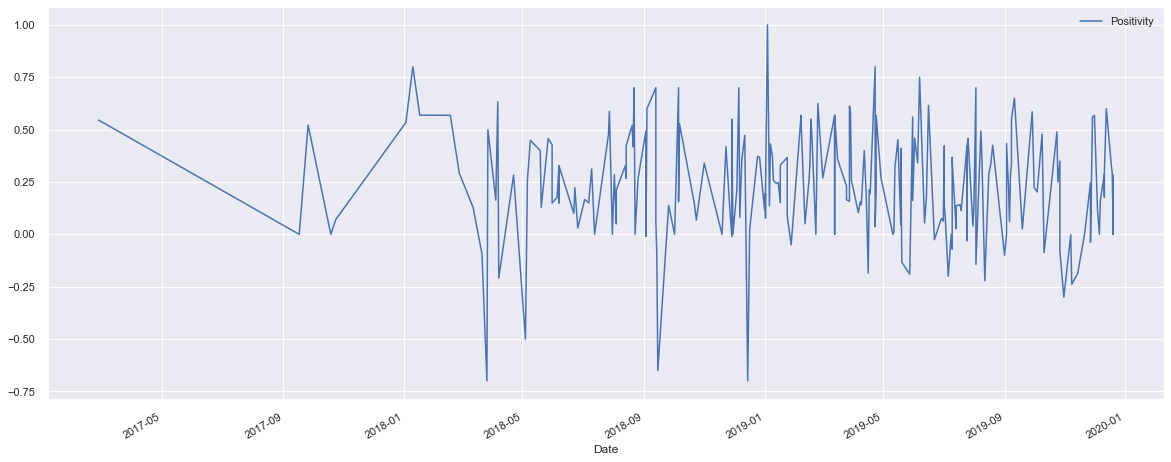

In [481]:
#Time series
batt_ts = batt.plot(x='Date', y='Positivity')

In [482]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.39811012239017574
Probability is:
4.931615933236906e-12


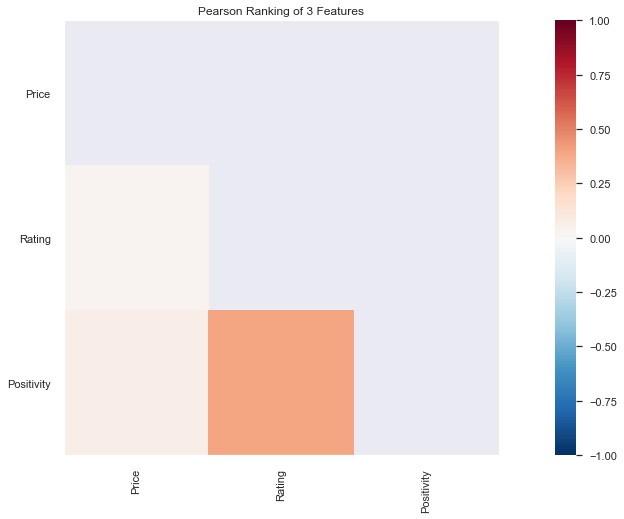

In [483]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = batt[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="c://batt.png") # Draw/show/poof the data

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


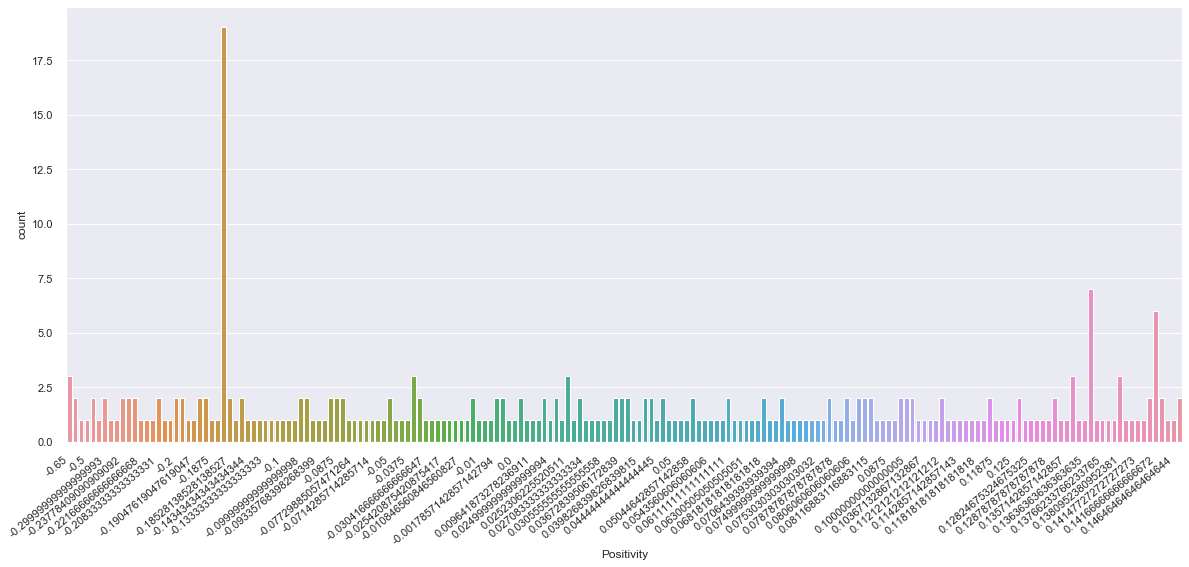

In [498]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [499]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Topic'] = 'Camera'
came.head()

C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Item #,Model,Price,Rating,Date,Review,Score,Positivity,Topic
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"tldr : great phone , look new . pay attent seller make choic - seller chang choos differ color . I bought buyspri . all good far . I incred hesit buy refurbish phone amazon read mani neg review variou product . I spent lot time research option figur one probabl safest bet . phone came perfect condit ( serious , look brand new ) far function seem great . set easi , unlock , readi set fingerprint everyth . It 's fast , sleek , beauti . camera audio also great . what I learn : seller import . although phone iphon 6S 64gb , select differ color , seller chang . when scroll look section `` compar similar item '' , see phone sold by . look review , neg review seem associ space gray color . I look rate seller color iphon 6S 64gb went there . As time review , space gray list `` item under review '' custom feedback .","(0.33379953379953375, 0.6558275058275058)",0.333800,Camera
7,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2017-10-24,"the product defect I wish I chosen anoth retail . It 's late you . 1 . defect batteri - the phone defect day arriv . the batteri hold charg consist indic long actual last . thi defect sporadic—so sometim work sometim doe n't . I thought I someth wrong first so , week frustrat , I test see : track long I charg long last . thi confirm fault defect charger phone I purchas electon deal problem . 2 . question secur - sinc day arriv , I 've someon tri 'access phone ' remot me . I never experienc I purchas new phone one credibl phone resel . 3 . defect camera - the camera stop work entir clear caus I drop damag way prior malfunct ( howev , honest , I scratch corner iron last week ) . all problem lead unfortun experi . An unreli phone leav strand danger situat : onc I charg phone day work , left late night I call cab . the electon deal phone die time I outsid , leav lock strand . the cab never came I walk citi midnight . It also risk job : I 100 % charg go bed I plug charg ( reason ) die morn alarm ring . I late work sever time end buy old alarm clock . whi I send back immedi ? - initi , I sure batteri issu defect . I tend trust seller wait verifi accus electron deal make bad sale . - the request access info made trust send back . mayb electon deal and , I sent phone back , I would risk ident theft . I still trust bring techi friend clear data ... - A cell phone small purchas . the time return it , receiv money back , purchas new one would leav disconnect 1K . - onc I confirm thi , I come system : use need , carri extern batteri alway plug work , home near power sourc . ignor request mysteri person hope best . onc camera die , doom clear I swindl electon deal . note : after mani email , compani eventu said I could return phone— howev , includ term essenti negat offer take back . mayb return term mistak send money back full . howev , I 've receiv gestur good faith indic sell work product fair busi . I may take $ 500 loss choic test instead return immedi . So advic pick anoth seller and , run ani issu , return the electron deal product immedi . rate 1 star . As point , I trust think either . also , suggest anoth credibl retail pleas share comment I find new work phone !","(0.0706439393939394, 0.3570145903479237)",0.070644,Camera
10,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-03,"Be veri cautiou buy phone them ! I purchas iphon 6s refurbish seller . initi , phone seem issu . As I continu use it , batteri life got progress wors . I past 90 day warranti , phone charg anymor . So I stuck defect phone & seller offer solut resolv issu . thi second time purchas item , first iphon 6s I purchas also problem camera . I strongli advis buy refurbish phone never again . basic take gambl money . I thought I save money , I wast time , energi , money long run . and not buy mywit .

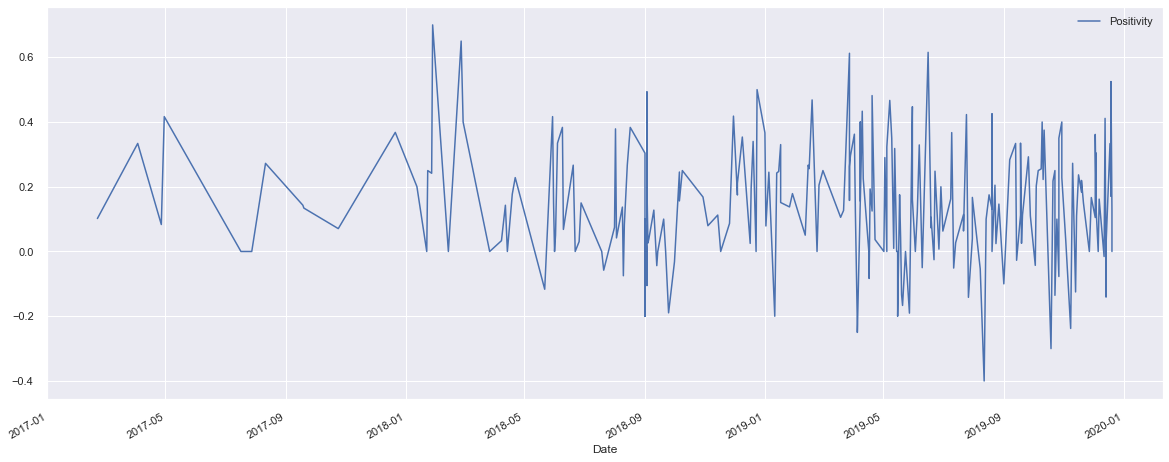

In [500]:
#Time series.
came_ts = came.plot(x='Date', y='Positivity')

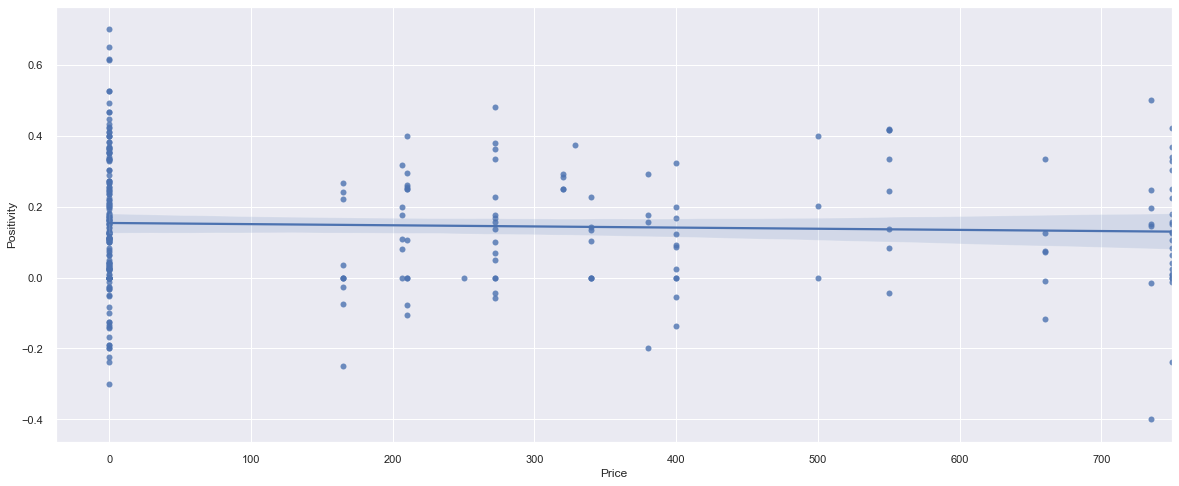

In [501]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=came)

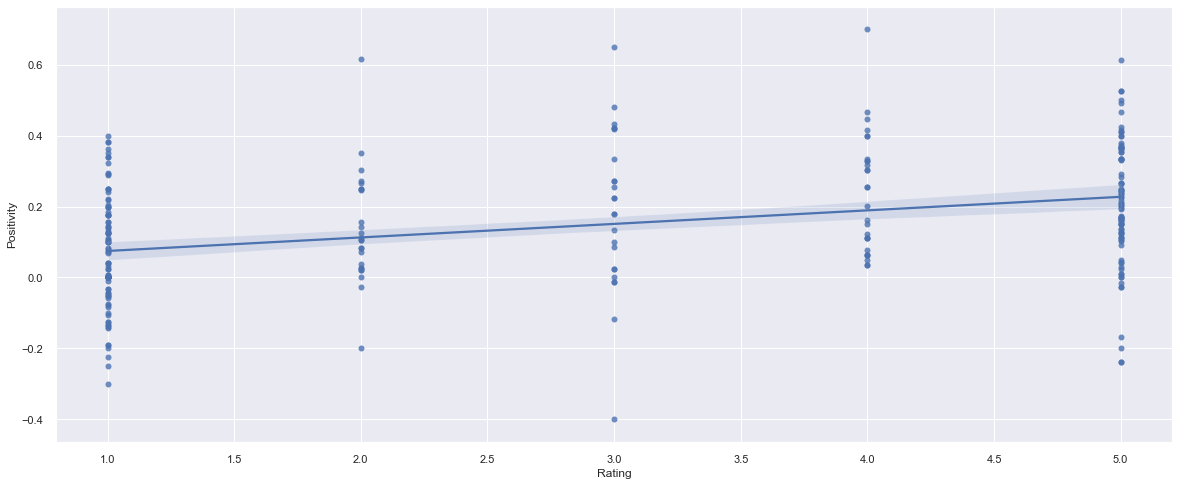

In [502]:
#Linear regression
sns.regplot(x='Rating',y="Positivity",data=came)

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


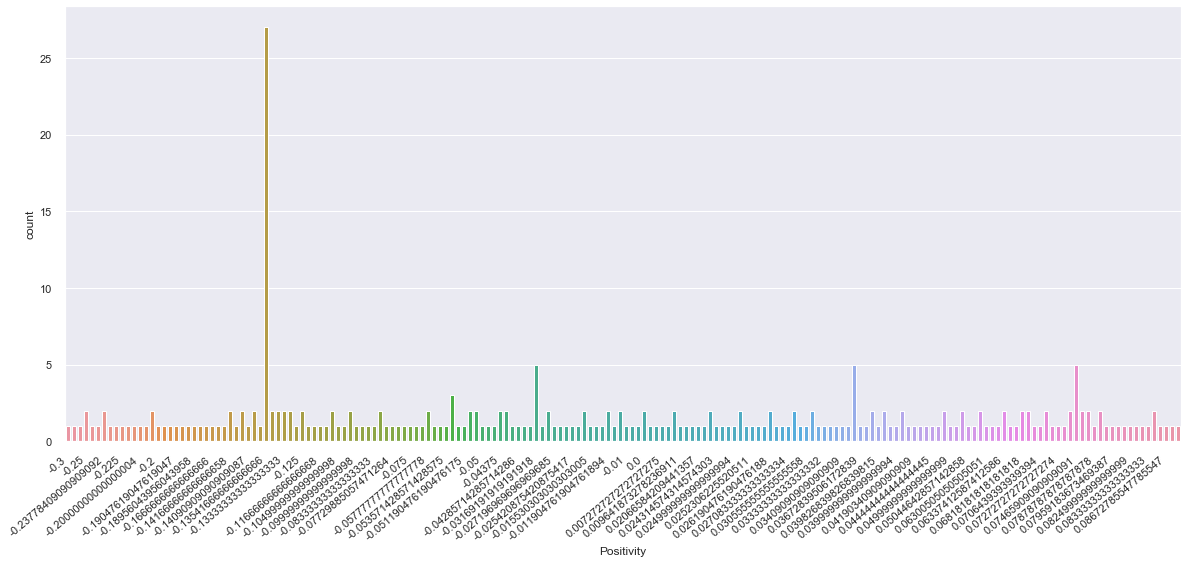

In [503]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

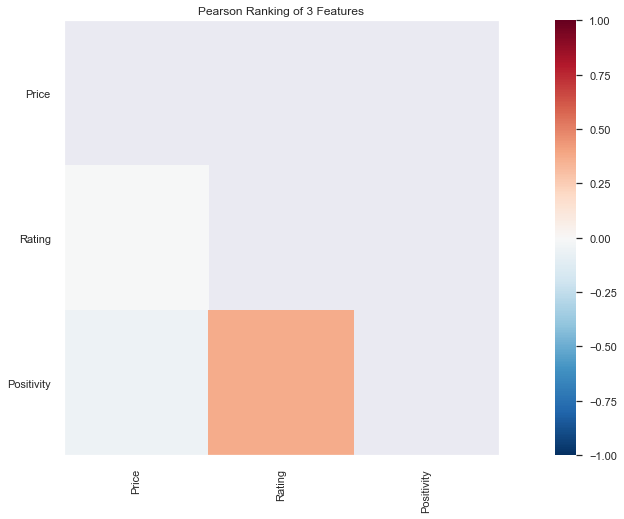

In [504]:
num_features = ['Price', 'Rating', 'Positivity']
X = came[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="c://came.png") # Draw/show/poof the data

In [505]:
#R2 info.
r, p = scipy.stats.pearsonr(came['Rating'],came['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.371154378178874
Probability is:
2.817614718862561e-10


In [506]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Topic'] = 'Speed'
spee.head()

C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Item #,Model,Price,Rating,Date,Review,Score,Positivity,Topic
2,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2019-06-15,I like batteri . the batteri jump percentag . the phone lag everi minut . I phone girlfriend phone start buzz control . the screen hesit touch time . the batteri charg & drain fast . the batti would drain fast hit random percentag & batteri would start drain normal there .,"(0.012500000000000004, 0.5874999999999999)",0.012500,Speed
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"tldr : great phone , look new . pay attent seller make choic - seller chang choos differ color . I bought buyspri . all good far . I incred hesit buy refurbish phone amazon read mani neg review variou product . I spent lot time research option figur one probabl safest bet . phone came perfect condit ( serious , look brand new ) far function seem great . set easi , unlock , readi set fingerprint everyth . It 's fast , sleek , beauti . camera audio also great . what I learn : seller import . although phone iphon 6S 64gb , select differ color , seller chang . when scroll look section `` compar similar item '' , see phone sold by . look review , neg review seem associ space gray color . I look rate seller color iphon 6S 64gb went there . As time review , space gray list `` item under review '' custom feedback .","(0.33379953379953375, 0.6558275058275058)",0.333800,Speed
11,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2019-03-22,"I 'm go blunt review : 1 . the phone came three day , awesom surpris origin said 7 . 2 . the phone look new . No scratch , dent . 3 . It come charg boot 5 minut plug in . 4 . the phone wa unlock origin languag prefer set spanish . aha . 5 . It took bit `` oomf '' open sim card tray . I tad nervou multipl attempt , I push bit harder last tri tray basic fell out . 6 . about batteri : My batteri health 81 % . I 've use 3 hour rapid pace , download app , set stuff -- drain tad , I expect anyth differ . I bet money it 'll stay charg least anoth 4-5 hour minim usag . for anyon complain batteri , one reason : A . you 're simpli glu put down . B . you notif everyth , mayb maximum bright , mayb multipl widget ? I highli recommend keep off , I ca n't speak everyon . what I know thi : If need thing , I 'd recommend replac batteri someth new . you grab diy replac $ 20 - not need go appl specif batteri . If like realli could careless notifications/multipl widgets/etc on , batteri liter fine . 7 . the devic extrem respons fast . 8 . It look feel sleek - even thinner I expect . 9 . the rose-gold color beauti . 10 . the devic came 5gb use 64gb . after download intens amount app , I 've use 7.4gb/64 . pretti awesom worri space ! 11 . I think price-point fantast get . ye , 2 year , updat stop releas model phone . howev , consid littl malwar linger io , I think safe say phone last long take care it . 12 . the camera gorgeou , front-fac camera one best I 've seen date . 13 . the headphon jack work , speaker work , thumbprint lock work . 14 . the phone compat t-mobil AT & T . I 'm realli unsur other . 15 . Do n't go crazi neg review . I start psych almost buy it , i 'm happi I did . should anyth up-to-par , I 'm sure either fixabl return .","(0.12678096757044124, 0.40106326422115895)",0.126781,Speed
13,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-08-01,"thi came old batteri . It batteri max capac 80 % mean phone die much faster phone new batteri . I didn ’ t realiz notic phone die 8 hour full charg overnight . By time , new phone set didn ’ t want go thru hassl send back start over . I think seller count that . now I set phone low batteri mode last day I time buy new batteri","(0.07465909090909091, 0.33678030303030304)",0.074659,Speed
16,B01GXAT0CE,"Apple iPhone SE, 16GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2017-11-18,"I wish I could gi

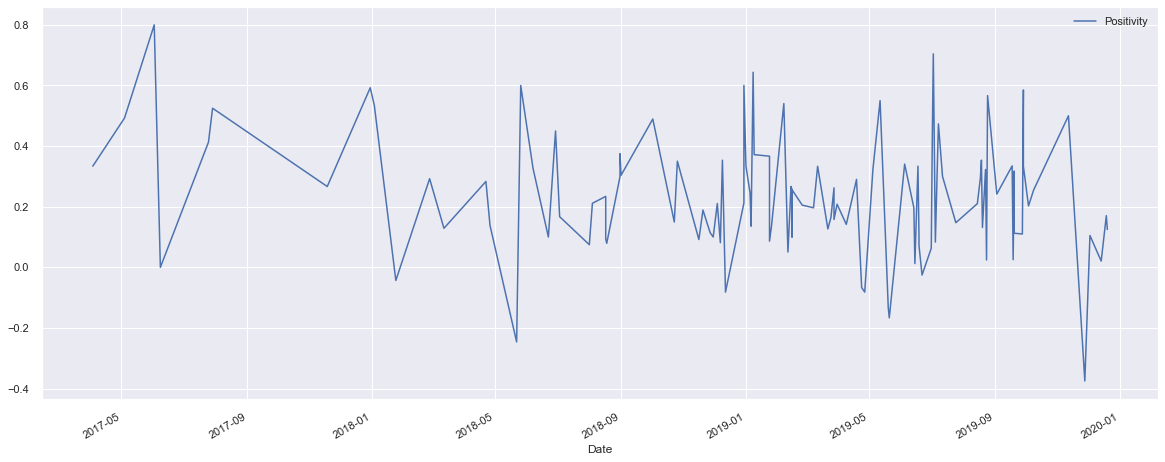

In [507]:
#Time series.
spee_ts = spee.plot(x='Date', y='Positivity')

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


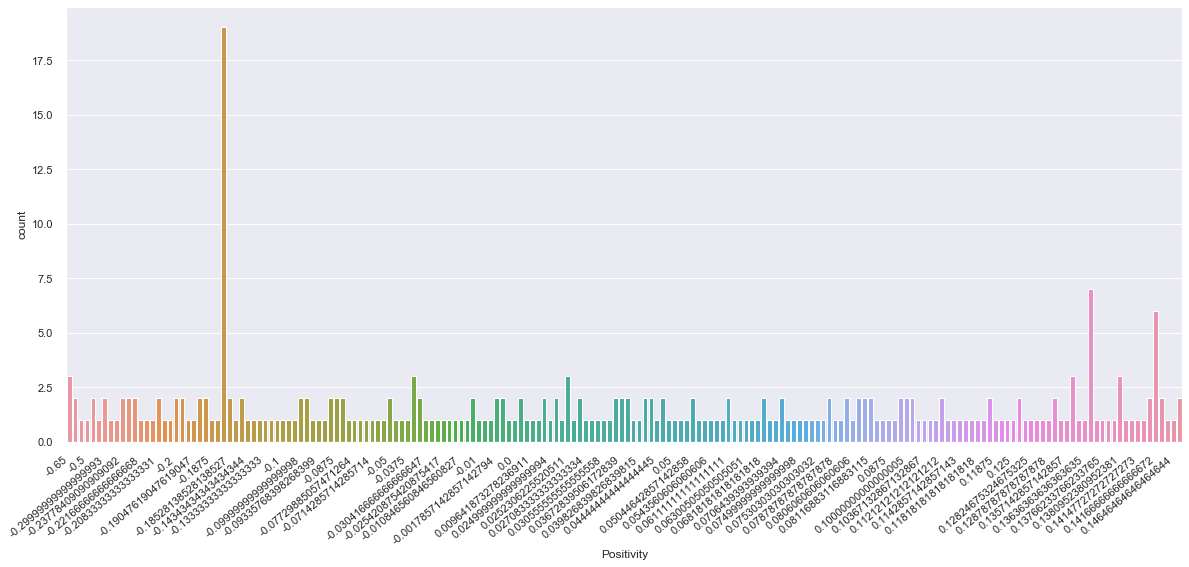

In [510]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

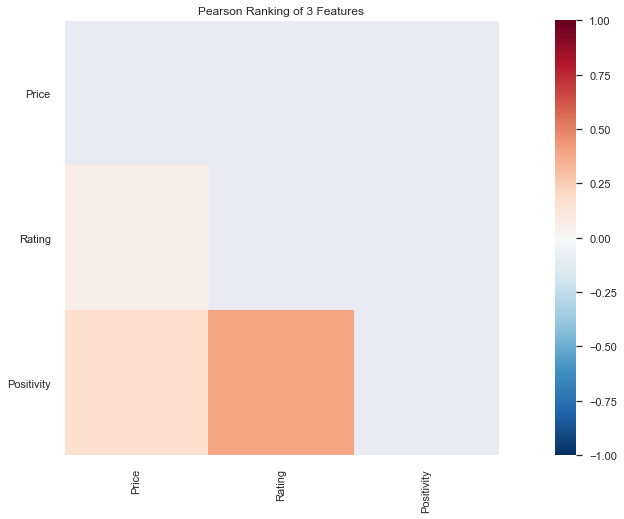

In [511]:
#Correlation map.
num_features = ['Price', 'Rating', 'Positivity']
X = spee[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="c://spee.png") # Draw/show/poof the data

In [512]:
#R2 info
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.391149084585276
Probability is:
2.099997940729592e-06


In [513]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Topic'] = 'Storage'
stor.head()

C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Item #,Model,Price,Rating,Date,Review,Score,Positivity,Topic
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"tldr : great phone , look new . pay attent seller make choic - seller chang choos differ color . I bought buyspri . all good far . I incred hesit buy refurbish phone amazon read mani neg review variou product . I spent lot time research option figur one probabl safest bet . phone came perfect condit ( serious , look brand new ) far function seem great . set easi , unlock , readi set fingerprint everyth . It 's fast , sleek , beauti . camera audio also great . what I learn : seller import . although phone iphon 6S 64gb , select differ color , seller chang . when scroll look section `` compar similar item '' , see phone sold by . look review , neg review seem associ space gray color . I look rate seller color iphon 6S 64gb went there . As time review , space gray list `` item under review '' custom feedback .","(0.33379953379953375, 0.6558275058275058)",0.333800,Storage
11,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2019-03-22,"I 'm go blunt review : 1 . the phone came three day , awesom surpris origin said 7 . 2 . the phone look new . No scratch , dent . 3 . It come charg boot 5 minut plug in . 4 . the phone wa unlock origin languag prefer set spanish . aha . 5 . It took bit `` oomf '' open sim card tray . I tad nervou multipl attempt , I push bit harder last tri tray basic fell out . 6 . about batteri : My batteri health 81 % . I 've use 3 hour rapid pace , download app , set stuff -- drain tad , I expect anyth differ . I bet money it 'll stay charg least anoth 4-5 hour minim usag . for anyon complain batteri , one reason : A . you 're simpli glu put down . B . you notif everyth , mayb maximum bright , mayb multipl widget ? I highli recommend keep off , I ca n't speak everyon . what I know thi : If need thing , I 'd recommend replac batteri someth new . you grab diy replac $ 20 - not need go appl specif batteri . If like realli could careless notifications/multipl widgets/etc on , batteri liter fine . 7 . the devic extrem respons fast . 8 . It look feel sleek - even thinner I expect . 9 . the rose-gold color beauti . 10 . the devic came 5gb use 64gb . after download intens amount app , I 've use 7.4gb/64 . pretti awesom worri space ! 11 . I think price-point fantast get . ye , 2 year , updat stop releas model phone . howev , consid littl malwar linger io , I think safe say phone last long take care it . 12 . the camera gorgeou , front-fac camera one best I 've seen date . 13 . the headphon jack work , speaker work , thumbprint lock work . 14 . the phone compat t-mobil AT & T . I 'm realli unsur other . 15 . Do n't go crazi neg review . I start psych almost buy it , i 'm happi I did . should anyth up-to-par , I 'm sure either fixabl return .","(0.12678096757044124, 0.40106326422115895)",0.126781,Storage
14,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,3,2018-05-22,pro phone arriv excel condit visibl damag properli unlock I ’ m cricket mobil I insert sim go . con after 3 day use phone shut would turn back without fulli charg . upon turn phone receiv error notif batteri could maintain peek perform solut contact seller avail . contact appl store inform base batteri statist batteri faulti need replac 29.99 schedul mainten next week result will updat trip appl verifi true qualiti phone overal honestli it ’ s inconveni batteri even addit fee replac batteri phone still come 300 64gb 6s I wish clariti certifi refurbish mean still satisfi product though custom servic may problem issu major luckili problem 30usd,"(-0.11666666666666668, 0.47291666666666665)",-0.116667,Storage
18,B01GXAT0CE,"Apple iPhone SE, 16GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-12-04,"I want second phone backup iphon SE . So I decid buy anoth one like it . the SE right size perform me , sadli discontinu model

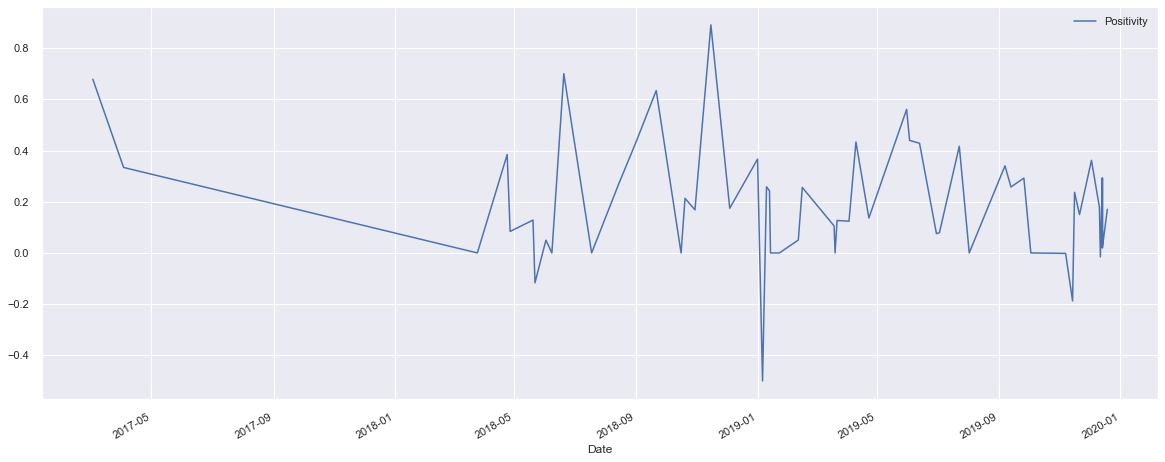

In [514]:
#Time series
stor_ts = stor.plot(x='Date', y='Positivity')

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


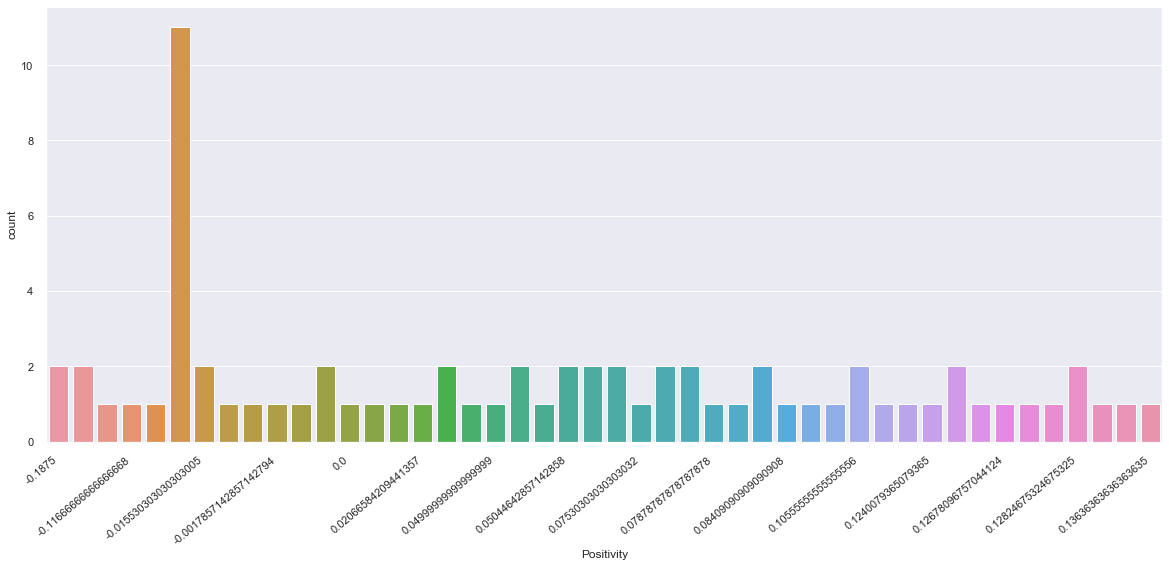

In [515]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

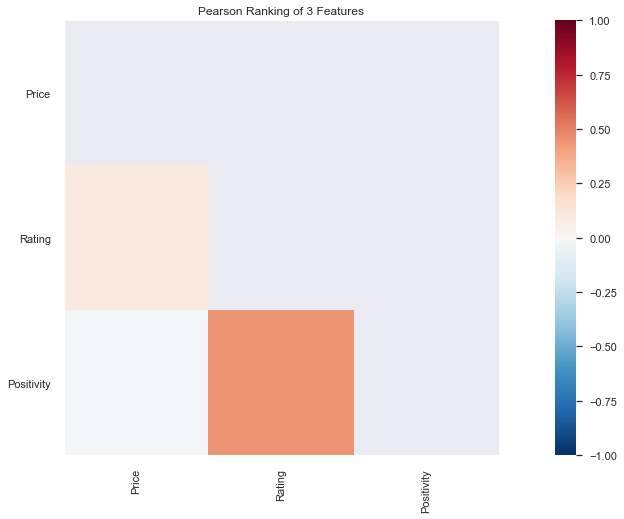

In [516]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = stor[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="c://stor.png") # Draw/show/poof the data

In [517]:
#R2 info
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.44585262701610795
Probability is:
9.75371133318483e-05


In [518]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Topic'] = 'Software'
soft.head()

C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Item #,Model,Price,Rating,Date,Review,Score,Positivity,Topic
11,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2019-03-22,"I 'm go blunt review : 1 . the phone came three day , awesom surpris origin said 7 . 2 . the phone look new . No scratch , dent . 3 . It come charg boot 5 minut plug in . 4 . the phone wa unlock origin languag prefer set spanish . aha . 5 . It took bit `` oomf '' open sim card tray . I tad nervou multipl attempt , I push bit harder last tri tray basic fell out . 6 . about batteri : My batteri health 81 % . I 've use 3 hour rapid pace , download app , set stuff -- drain tad , I expect anyth differ . I bet money it 'll stay charg least anoth 4-5 hour minim usag . for anyon complain batteri , one reason : A . you 're simpli glu put down . B . you notif everyth , mayb maximum bright , mayb multipl widget ? I highli recommend keep off , I ca n't speak everyon . what I know thi : If need thing , I 'd recommend replac batteri someth new . you grab diy replac $ 20 - not need go appl specif batteri . If like realli could careless notifications/multipl widgets/etc on , batteri liter fine . 7 . the devic extrem respons fast . 8 . It look feel sleek - even thinner I expect . 9 . the rose-gold color beauti . 10 . the devic came 5gb use 64gb . after download intens amount app , I 've use 7.4gb/64 . pretti awesom worri space ! 11 . I think price-point fantast get . ye , 2 year , updat stop releas model phone . howev , consid littl malwar linger io , I think safe say phone last long take care it . 12 . the camera gorgeou , front-fac camera one best I 've seen date . 13 . the headphon jack work , speaker work , thumbprint lock work . 14 . the phone compat t-mobil AT & T . I 'm realli unsur other . 15 . Do n't go crazi neg review . I start psych almost buy it , i 'm happi I did . should anyth up-to-par , I 'm sure either fixabl return .","(0.12678096757044124, 0.40106326422115895)",0.126781,Software
14,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,3,2018-05-22,pro phone arriv excel condit visibl damag properli unlock I ’ m cricket mobil I insert sim go . con after 3 day use phone shut would turn back without fulli charg . upon turn phone receiv error notif batteri could maintain peek perform solut contact seller avail . contact appl store inform base batteri statist batteri faulti need replac 29.99 schedul mainten next week result will updat trip appl verifi true qualiti phone overal honestli it ’ s inconveni batteri even addit fee replac batteri phone still come 300 64gb 6s I wish clariti certifi refurbish mean still satisfi product though custom servic may problem issu major luckili problem 30usd,"(-0.11666666666666668, 0.47291666666666665)",-0.116667,Software
16,B01GXAT0CE,"Apple iPhone SE, 16GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2017-11-18,"I wish I could give neg star . I bought po phone boyfriend christma . It came quickli looked/work nice . took verizon get activ , appar phone receiv stolen phone list . I embarrass . they ask got phone ect though crimin . thank much ruin christma present boyfriend , embarrass wast lot time .","(0.26666666666666666, 0.39999999999999997)",0.266667,Software
18,B01GXAT0CE,"Apple iPhone SE, 16GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-12-04,"I want second phone backup iphon SE . So I decid buy anoth one like it . the SE right size perform me , sadli discontinu model . I found 64gb space gray unlock unit refurbish product good price seller call mywit . It prime item fulfil amazon I alway look for . I heard horror stori buy `` refurbish '' phone , I contact seller question . these answer promptli courteous , even though weekend . base contact seller , I made purchas sunday . My phone arriv tuesday afternoon , I surpris find seal verizon carton said `` certifi pre-own '' . everyth insid look new , wrap plastic ship plastic film protect screen . I could find singl mark would indic u

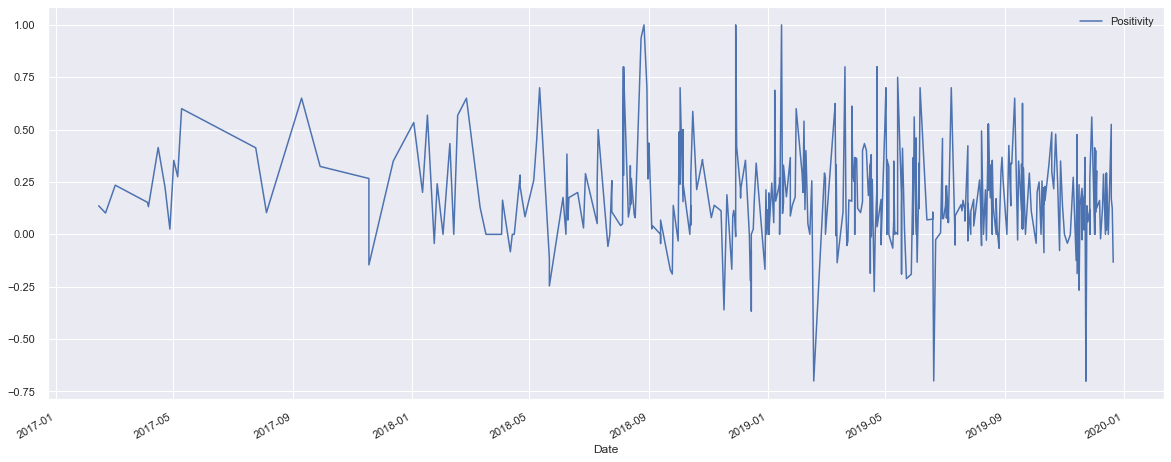

In [519]:
#Time series
soft_ts = soft.plot(x='Date', y='Positivity')

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


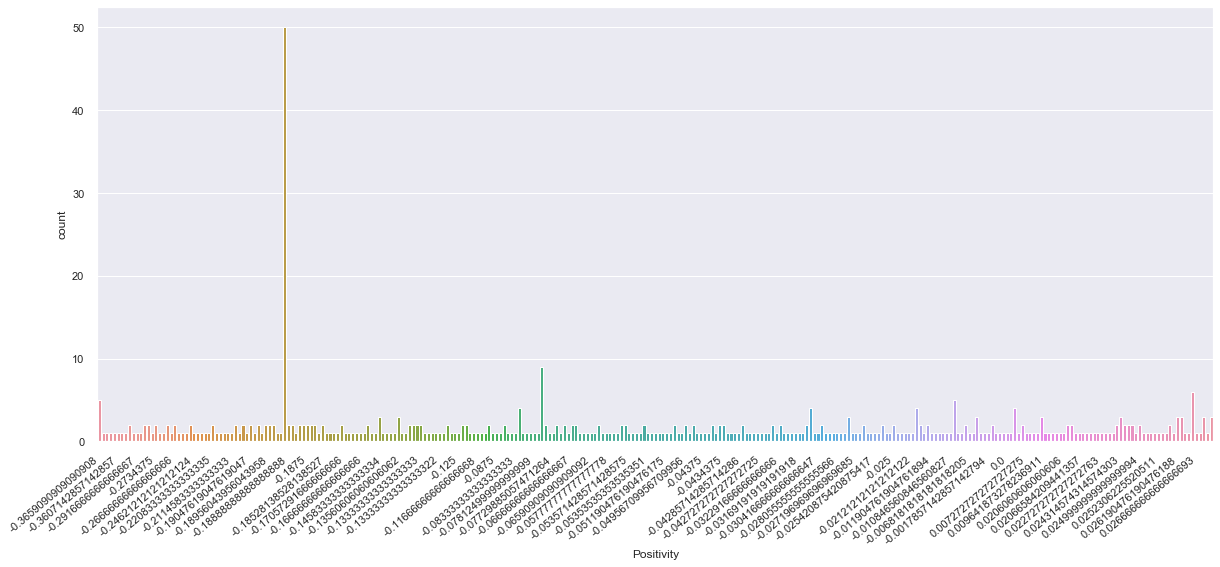

In [523]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

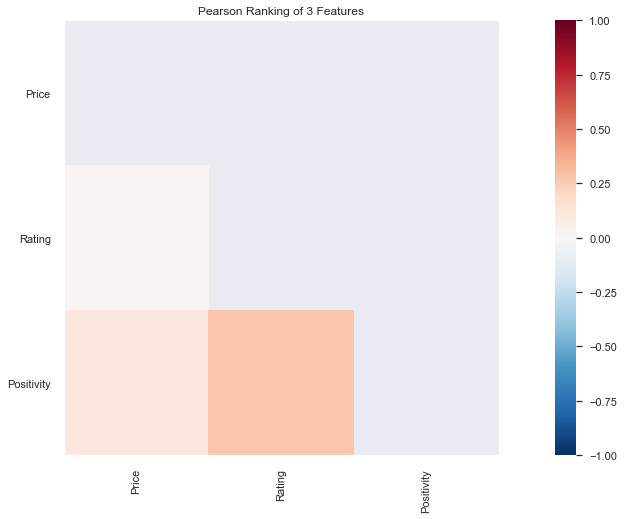

In [524]:
num_features = ['Price', 'Rating', 'Positivity']
X = soft[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [525]:
#R2 info
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.2807411715889655
Probability is:
6.606760158013426e-10


In [526]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Topic'] = 'Music'
musi.head()

C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Item #,Model,Price,Rating,Date,Review,Score,Positivity,Topic
5,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2017-04-03,"tldr : great phone , look new . pay attent seller make choic - seller chang choos differ color . I bought buyspri . all good far . I incred hesit buy refurbish phone amazon read mani neg review variou product . I spent lot time research option figur one probabl safest bet . phone came perfect condit ( serious , look brand new ) far function seem great . set easi , unlock , readi set fingerprint everyth . It 's fast , sleek , beauti . camera audio also great . what I learn : seller import . although phone iphon 6S 64gb , select differ color , seller chang . when scroll look section `` compar similar item '' , see phone sold by . look review , neg review seem associ space gray color . I look rate seller color iphon 6S 64gb went there . As time review , space gray list `` item under review '' custom feedback .","(0.33379953379953375, 0.6558275058275058)",0.333800,Music
11,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2019-03-22,"I 'm go blunt review : 1 . the phone came three day , awesom surpris origin said 7 . 2 . the phone look new . No scratch , dent . 3 . It come charg boot 5 minut plug in . 4 . the phone wa unlock origin languag prefer set spanish . aha . 5 . It took bit `` oomf '' open sim card tray . I tad nervou multipl attempt , I push bit harder last tri tray basic fell out . 6 . about batteri : My batteri health 81 % . I 've use 3 hour rapid pace , download app , set stuff -- drain tad , I expect anyth differ . I bet money it 'll stay charg least anoth 4-5 hour minim usag . for anyon complain batteri , one reason : A . you 're simpli glu put down . B . you notif everyth , mayb maximum bright , mayb multipl widget ? I highli recommend keep off , I ca n't speak everyon . what I know thi : If need thing , I 'd recommend replac batteri someth new . you grab diy replac $ 20 - not need go appl specif batteri . If like realli could careless notifications/multipl widgets/etc on , batteri liter fine . 7 . the devic extrem respons fast . 8 . It look feel sleek - even thinner I expect . 9 . the rose-gold color beauti . 10 . the devic came 5gb use 64gb . after download intens amount app , I 've use 7.4gb/64 . pretti awesom worri space ! 11 . I think price-point fantast get . ye , 2 year , updat stop releas model phone . howev , consid littl malwar linger io , I think safe say phone last long take care it . 12 . the camera gorgeou , front-fac camera one best I 've seen date . 13 . the headphon jack work , speaker work , thumbprint lock work . 14 . the phone compat t-mobil AT & T . I 'm realli unsur other . 15 . Do n't go crazi neg review . I start psych almost buy it , i 'm happi I did . should anyth up-to-par , I 'm sure either fixabl return .","(0.12678096757044124, 0.40106326422115895)",0.126781,Music
12,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2017-05-03,"I thought phone great I start receiv phone call . At first I thought person line who 's phone mess up . after phone call obviou phone work properli call sound like person mile away , hard hear unless put speaker phone . thi one fear buy `` certifi refurbish '' product unfortun I right .","(0.2115079365079365, 0.4559523809523809)",0.211508,Music
15,B01GXAT0CE,"Apple iPhone SE, 16GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-05-31,"thi phone half price new iphon SE , replac one I bought run semi truck ( long stori . ) It includ wall charger phone cord ( it includ headphon ) , brand new look iphon . It 1 minor scratch back phone . howev , sinc refurbish item , I would think qualiti vari devic devic . warn : As use item , I would recommend thoroughli inspect item . run screen check , batteri capac test , check water damag , check imei , look see seller high rate , work . ( if sound confus , look term check mean . It take 

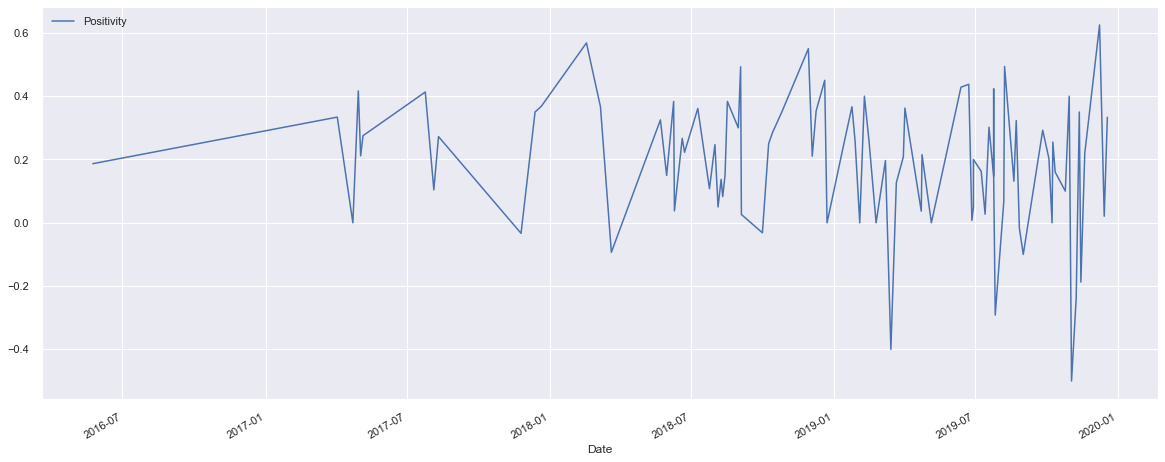

In [527]:
#Time series
musi_ts = musi.plot(x='Date', y='Positivity')

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


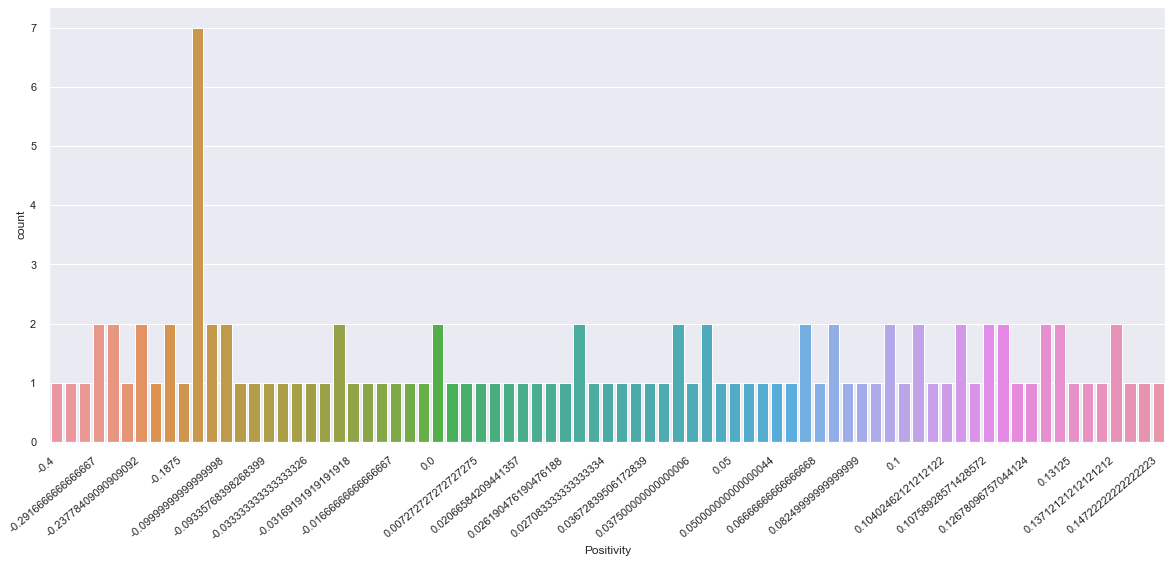

In [528]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

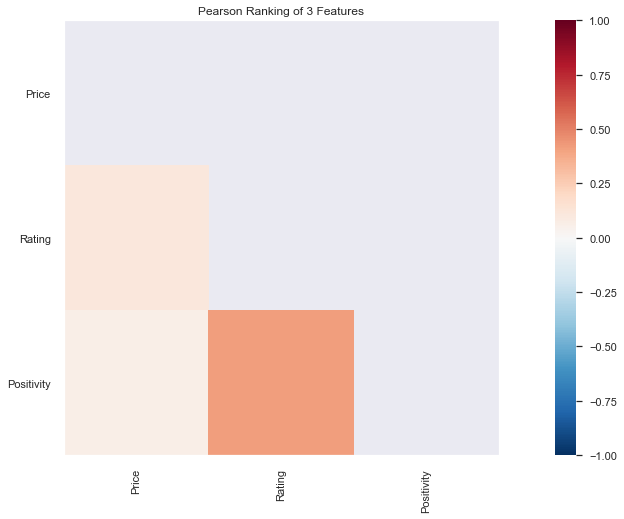

In [529]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = musi[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="c://musi.png") # Draw/show/poof the data

In [530]:
#R2 info
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.4198171298820317
Probability is:
7.470636463103816e-06


In [531]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Topic'] = 'Screen'
scre.head()

C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Item #,Model,Price,Rating,Date,Review,Score,Positivity,Topic
0,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,5,2018-10-26,great ! minor scratch screen bare notic,"(0.3333333333333333, 0.35000000000000003)",0.333333,Screen
2,B01AUOS8BI,"Apple iPhone 6S Plus, 128GB, Rose Gold - For AT&T / T-Mobile (Renewed)",0.00,1,2019-06-15,I like batteri . the batteri jump percentag . the phone lag everi minut . I phone girlfriend phone start buzz control . the screen hesit touch time . the batteri charg & drain fast . the batti would drain fast hit random percentag & batteri would start drain normal there .,"(0.012500000000000004, 0.5874999999999999)",0.012500,Screen
7,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2017-10-24,"the product defect I wish I chosen anoth retail . It 's late you . 1 . defect batteri - the phone defect day arriv . the batteri hold charg consist indic long actual last . thi defect sporadic—so sometim work sometim doe n't . I thought I someth wrong first so , week frustrat , I test see : track long I charg long last . thi confirm fault defect charger phone I purchas electon deal problem . 2 . question secur - sinc day arriv , I 've someon tri 'access phone ' remot me . I never experienc I purchas new phone one credibl phone resel . 3 . defect camera - the camera stop work entir clear caus I drop damag way prior malfunct ( howev , honest , I scratch corner iron last week ) . all problem lead unfortun experi . An unreli phone leav strand danger situat : onc I charg phone day work , left late night I call cab . the electon deal phone die time I outsid , leav lock strand . the cab never came I walk citi midnight . It also risk job : I 100 % charg go bed I plug charg ( reason ) die morn alarm ring . I late work sever time end buy old alarm clock . whi I send back immedi ? - initi , I sure batteri issu defect . I tend trust seller wait verifi accus electron deal make bad sale . - the request access info made trust send back . mayb electon deal and , I sent phone back , I would risk ident theft . I still trust bring techi friend clear data ... - A cell phone small purchas . the time return it , receiv money back , purchas new one would leav disconnect 1K . - onc I confirm thi , I come system : use need , carri extern batteri alway plug work , home near power sourc . ignor request mysteri person hope best . onc camera die , doom clear I swindl electon deal . note : after mani email , compani eventu said I could return phone— howev , includ term essenti negat offer take back . mayb return term mistak send money back full . howev , I 've receiv gestur good faith indic sell work product fair busi . I may take $ 500 loss choic test instead return immedi . So advic pick anoth seller and , run ani issu , return the electron deal product immedi . rate 1 star . As point , I trust think either . also , suggest anoth credibl retail pleas share comment I find new work phone !","(0.0706439393939394, 0.3570145903479237)",0.070644,Screen
11,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2019-03-22,"I 'm go blunt review : 1 . the phone came three day , awesom surpris origin said 7 . 2 . the phone look new . No scratch , dent . 3 . It come charg boot 5 minut plug in . 4 . the phone wa unlock origin languag prefer set spanish . aha . 5 . It took bit `` oomf '' open sim card tray . I tad nervou multipl attempt , I push bit harder last tri tray basic fell out . 6 . about batteri : My batteri health 81 % . I 've use 3 hour rapid pace , download app , set stuff -- drain tad , I expect anyth differ . I bet money it 'll stay charg least anoth 4-5 hour minim usag . for anyon complain batteri , one reason : A . you 're simpli glu put down . B . you notif everyth , mayb maximum bright , mayb multipl widget ? I highli recommend keep off , I ca n't speak everyon . what I know thi : If need thing , I 'd recommend replac batteri so

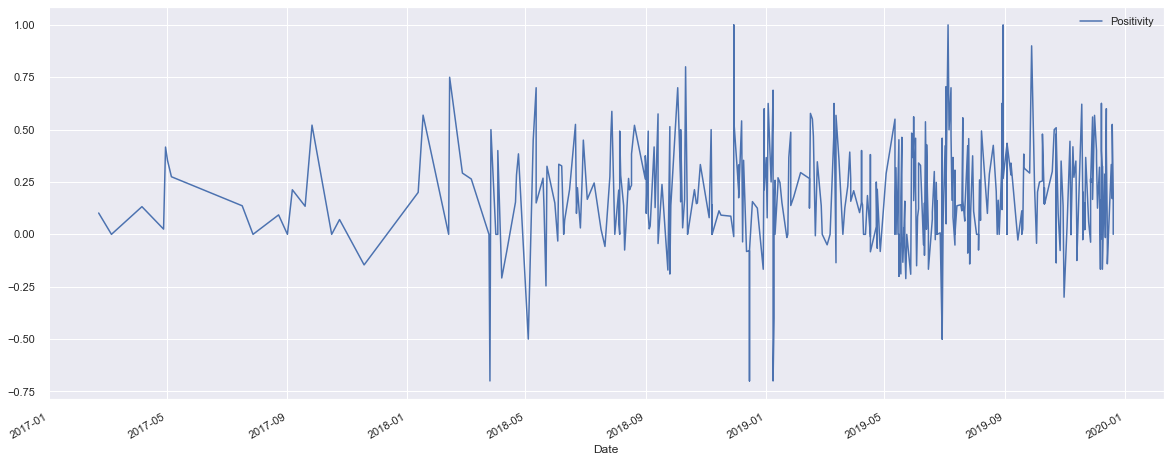

In [532]:
#Time series
scre_ts = scre.plot(x='Date', y='Positivity')

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


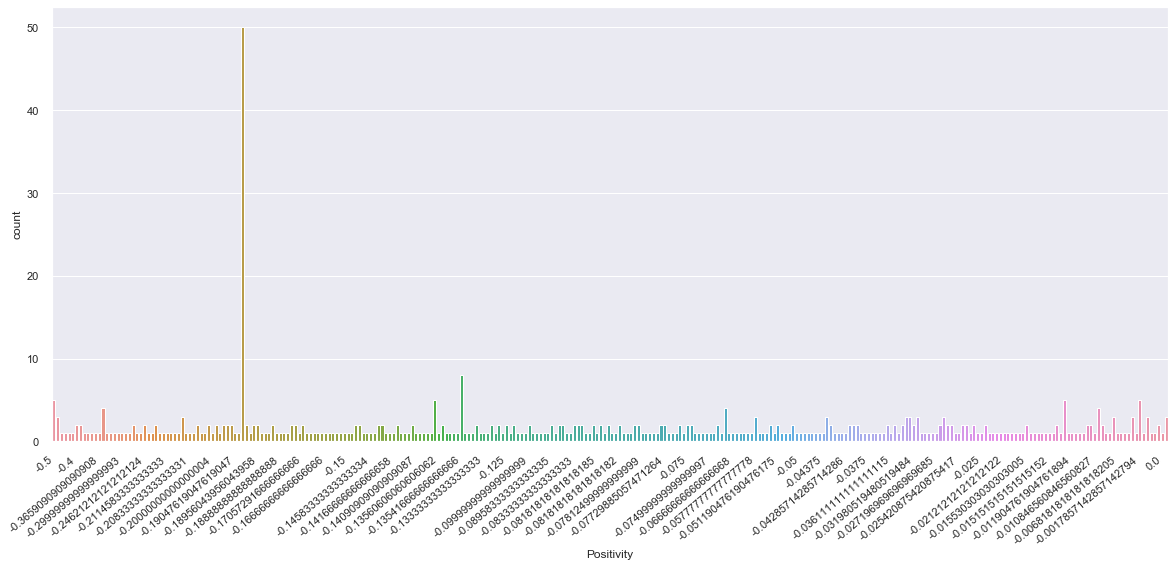

In [534]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 6
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

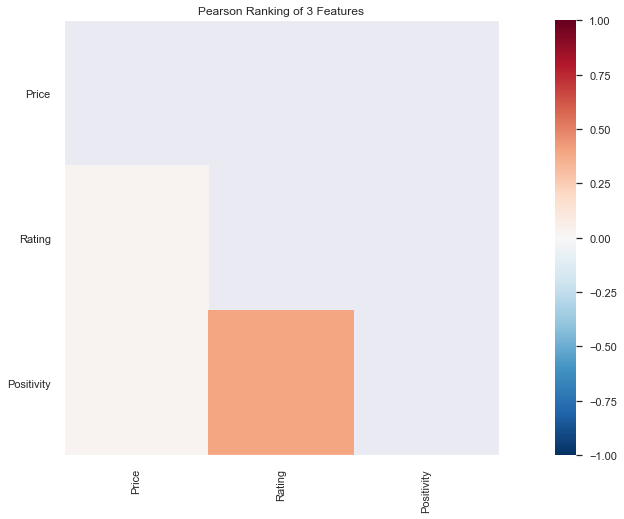

In [543]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = scre[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="c://scre.png") # Draw/show/poof the data

In [544]:
#R2 info
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.39184425535022394
Probability is:
7.613778244105479e-19


In [545]:
#Merging the dataframes in one..
a_df = [batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()

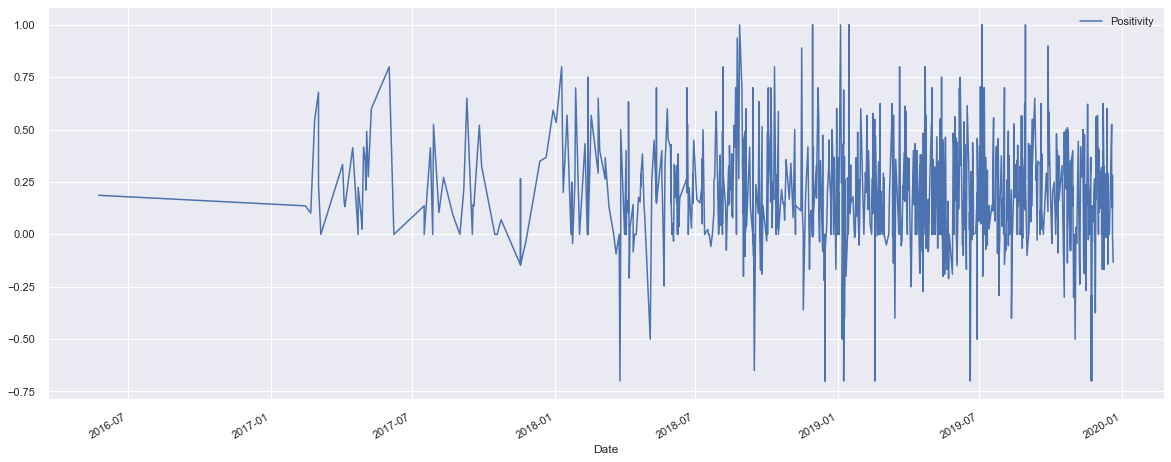

In [546]:
#Time series info
a_df_ts = a_df.plot(x='Date', y='Positivity')

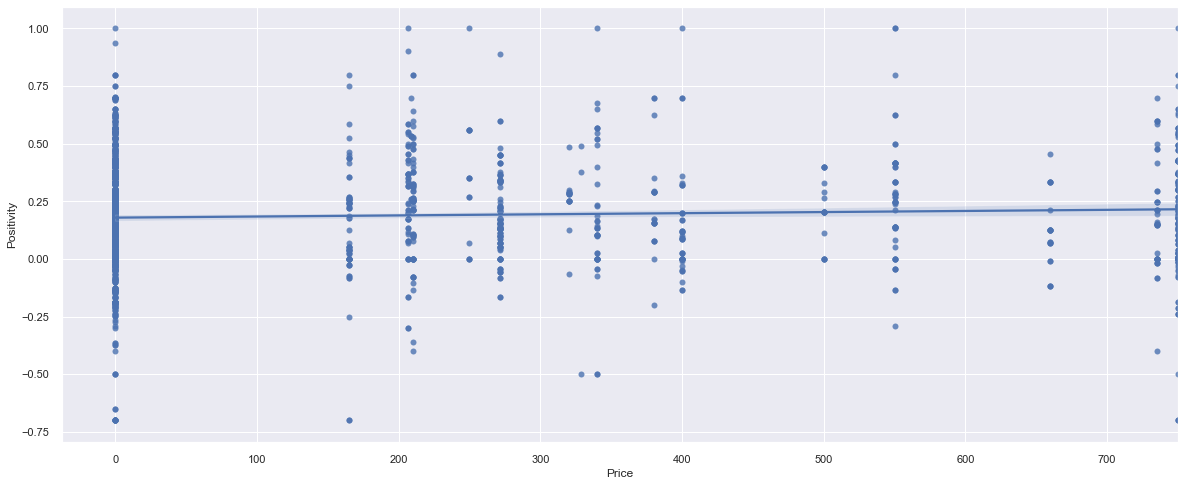

In [547]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


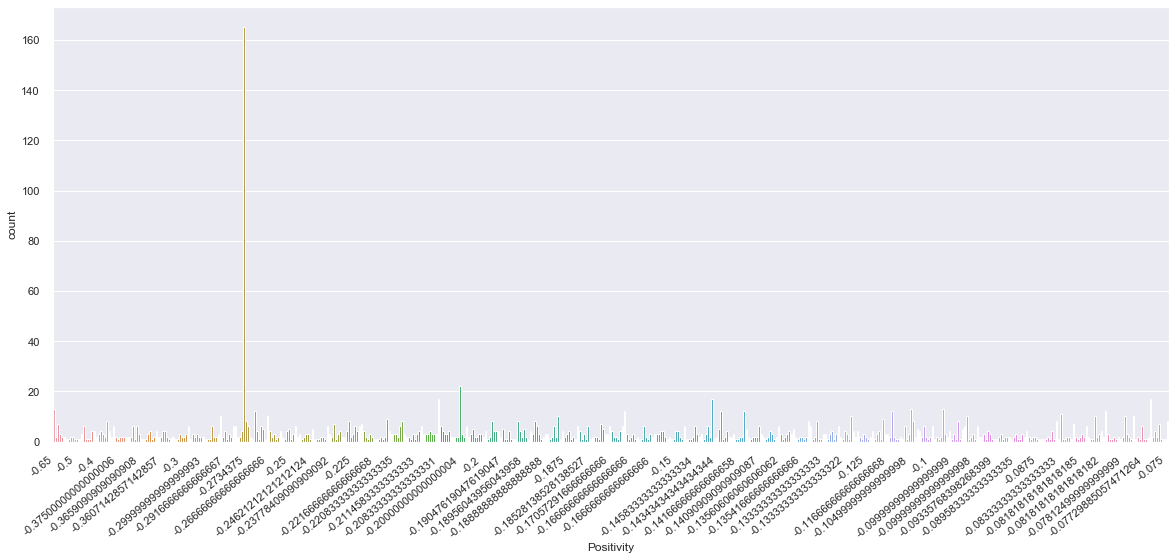

In [542]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

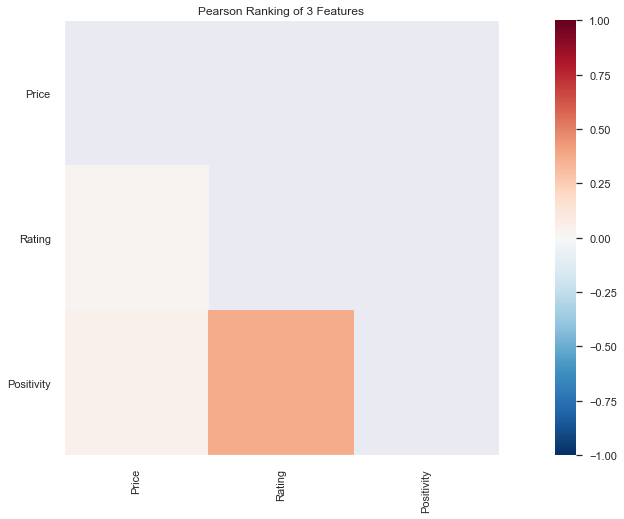

In [548]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = a_df[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="c://adf.png") # Draw/show/poof the data

In [549]:
#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical])
a_df_cat.head()

,Topic_Battery,Topic_Camera,Topic_Music,Topic_Screen,Topic_Software,Topic_Speed,Topic_Storage,Item #_B01AUOS8BI,Item #_B01CR1FQMG,Item #_B01GXAT0CE,...,Item #_B07HKQ61NV,Item #_B07KFNRQ5S,Item #_B07KKL5KGG,Item #_B07P6Y8L3F,Item #_B07Q6VQ147,Item #_B07RDMLR4V,Item #_B07RKYQSRB,Item #_B07RT1X4FJ,Item #_B07SVPKTYK,Item #_B07ZPKZSSC
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [550]:
#Listing the columns
list(a_df_cat.columns)

['Topic_Battery',
 'Topic_Camera',
 'Topic_Music',
 'Topic_Screen',
 'Topic_Software',
 'Topic_Speed',
 'Topic_Storage',
 'Item #_B01AUOS8BI',
 'Item #_B01CR1FQMG',
 'Item #_B01GXAT0CE',
 'Item #_B01JAWWVXW',
 'Item #_B01LYHIUQ7',
 'Item #_B01N4IHGHI',
 'Item #_B01N4R20RS',
 'Item #_B01N9I0RWL',
 'Item #_B01N9YO1DS',
 'Item #_B06X9X15Y8',
 'Item #_B06XGLHP8V',
 'Item #_B06XR1K6HR',
 'Item #_B06XR8G1TX',
 'Item #_B06XRG6S73',
 'Item #_B06XRJQX91',
 'Item #_B06XRJXL3R',
 'Item #_B06XRN4RWL',
 'Item #_B06XS3CTJM',
 'Item #_B06XS4978K',
 'Item #_B071JPQYGK',
 'Item #_B071W9WQ8M',
 'Item #_B0731HBTZ7',
 'Item #_B0732NTJ2M',
 'Item #_B0743HD6MS',
 'Item #_B07643YNY8',
 'Item #_B076KC34PM',
 'Item #_B07753NSQZ',
 'Item #_B0775451TT',
 'Item #_B07755LZ67',
 'Item #_B07756QYST',
 'Item #_B0775717ZP',
 'Item #_B077578VXH',
 'Item #_B077578W38',
 'Item #_B0775H5HJW',
 'Item #_B077NJQPGB',
 'Item #_B077NTKFDB',
 'Item #_B078WZ86Y9',
 'Item #_B079HB518K',
 'Item #_B07CGMQDXW',
 'Item #_B07CZR8YV4',

In [551]:
#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]

In [552]:
#Reviewing the new dataset
a_df.head()

,index,Item #,Model,Price,Rating,Date,Review,Score,Positivity,Topic,...,Item #_B07HKQ61NV,Item #_B07KFNRQ5S,Item #_B07KKL5KGG,Item #_B07P6Y8L3F,Item #_B07Q6VQ147,Item #_B07RDMLR4V,Item #_B07RKYQSRB,Item #_B07RT1X4FJ,Item #_B07SVPKTYK,Item #_B07ZPKZSSC
0,7,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2017-10-24,"the product defect I wish I chosen anoth retail . It 's late you . 1 . defect batteri - the phone defect day arriv . the batteri hold charg consist indic long actual last . thi defect sporadic—so sometim work sometim doe n't . I thought I someth wrong first so , week frustrat , I test see : track long I charg long last . thi confirm fault defect charger phone I purchas electon deal problem . 2 . question secur - sinc day arriv , I 've someon tri 'access phone ' remot me . I never experienc I purchas new phone one credibl phone resel . 3 . defect camera - the camera stop work entir clear caus I drop damag way prior malfunct ( howev , honest , I scratch corner iron last week ) . all problem lead unfortun experi . An unreli phone leav strand danger situat : onc I charg phone day work , left late night I call cab . the electon deal phone die time I outsid , leav lock strand . the cab never came I walk citi midnight . It also risk job : I 100 % charg go bed I plug charg ( reason ) die morn alarm ring . I late work sever time end buy old alarm clock . whi I send back immedi ? - initi , I sure batteri issu defect . I tend trust seller wait verifi accus electron deal make bad sale . - the request access info made trust send back . mayb electon deal and , I sent phone back , I would risk ident theft . I still trust bring techi friend clear data ... - A cell phone small purchas . the time return it , receiv money back , purchas new one would leav disconnect 1K . - onc I confirm thi , I come system : use need , carri extern batteri alway plug work , home near power sourc . ignor request mysteri person hope best . onc camera die , doom clear I swindl electon deal . note : after mani email , compani eventu said I could return phone— howev , includ term essenti negat offer take back . mayb return term mistak send money back full . howev , I 've receiv gestur good faith indic sell work product fair busi . I may take $ 500 loss choic test instead return immedi . So advic pick anoth seller and , run ani issu , return the electron deal product immedi . rate 1 star . As point , I trust think either . also , suggest anoth credibl retail pleas share comment I find new work phone !","(0.0706439393939394, 0.3570145903479237)",0.070644,Battery,...,0,0,0,0,0,0,0,0,0,0
1,9,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,5,2018-05-27,"got daughter first smart phone . wa n't go spend $ 400-500 phone , went factori refurbish rout . It nice phone , look new me . came non-oem charger cabl , work care . ear phone that 's ok. what I like avail 1 year protect plan pop I place phone cart - protect plan offer pop phone choic I would place one cart delet protect plan offer , repeat I found one did . all I think good buy . squar trade provid protect plan . I use kindl sever year ago great job replac son broke it .","(0.45723562152133584, 0.6115337043908473)",0.457236,Battery,...,0,0,0,0,0,0,0,0,0,0
2,10,B01CR1FQMG,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)",659.99,1,2018-09-03,"Be veri cautiou buy phone them ! I purchas iphon 6s refurbish seller . initi , phone seem issu . As I continu use it , batteri life got progress wors . I past 90 day warranti , phone charg anymor . So I stuck defect phone & seller offer solut resolv issu . thi second time purchas item , first iphon 6s I purchas also problem camera . I strongli advis buy refurbish phone never again . basic take gambl money . I thought I save money , I wast time , energi , money long run . and not buy mywit .","(-0.01, 0.22166666666666668)",-0.010000,Battery,...,0,0,0,0,0,0,0,0,0,0
3,15,B01GXAT0CE,"App

In [553]:
#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
a_df.head()

,Price,Rating,Date,Score,Positivity,Topic_Battery,Topic_Camera,Topic_Music,Topic_Screen,Topic_Software,...,Item #_B07HKQ61NV,Item #_B07KFNRQ5S,Item #_B07KKL5KGG,Item #_B07P6Y8L3F,Item #_B07Q6VQ147,Item #_B07RDMLR4V,Item #_B07RKYQSRB,Item #_B07RT1X4FJ,Item #_B07SVPKTYK,Item #_B07ZPKZSSC
0,659.99,1,2017-10-24,"(0.0706439393939394, 0.3570145903479237)",0.070644,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,659.99,5,2018-05-27,"(0.45723562152133584, 0.6115337043908473)",0.457236,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,659.99,1,2018-09-03,"(-0.01, 0.22166666666666668)",-0.010000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.00,5,2018-05-31,"(0.14960700757575757, 0.4417440025252525)",0.149607,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.00,5,2018-08-14,"(0.26691919191919194, 0.5397306397306397)",0.266919,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [554]:
#Creating a list and looping through to format.
a_df_list = ['Item #_B01AUOS8BI','Item #_B01CR1FQMG','Item #_B01GXAT0CE','Item #_B01JAWWVXW','Item #_B01LYHIUQ7',
'Item #_B01N4IHGHI','Item #_B01N4R20RS','Item #_B01N9I0RWL','Item #_B01N9YO1DS','Item #_B06X9X15Y8','Item #_B06XGLHP8V',
'Item #_B06XR1K6HR','Item #_B06XR8G1TX','Item #_B06XRG6S73','Item #_B06XRJQX91','Item #_B06XRJXL3R','Item #_B06XRN4RWL',
'Item #_B06XS3CTJM','Item #_B06XS4978K','Item #_B071JPQYGK','Item #_B071W9WQ8M','Item #_B0731HBTZ7','Item #_B0732NTJ2M',
'Item #_B0743HD6MS','Item #_B07643YNY8','Item #_B076KC34PM','Item #_B07753NSQZ','Item #_B0775451TT','Item #_B07755LZ67',
'Item #_B07756QYST','Item #_B0775717ZP','Item #_B077578VXH','Item #_B077578W38','Item #_B0775H5HJW','Item #_B077NJQPGB', 
'Item #_B077NTKFDB','Item #_B078WZ86Y9','Item #_B079HB518K','Item #_B07CGMQDXW','Item #_B07CZR8YV4','Item #_B07D6TQP6F',
'Item #_B07G7FG26S','Item #_B07HKQ61NV','Item #_B07KFNRQ5S','Item #_B07KKL5KGG','Item #_B07P6Y8L3F','Item #_B07Q6VQ147',
'Item #_B07RDMLR4V', 'Item #_B07RKYQSRB', 'Item #_B07RT1X4FJ','Item #_B07SVPKTYK','Item #_B07ZPKZSSC','Topic_Battery',
'Topic_Camera','Topic_Music','Topic_Screen','Topic_Software','Topic_Speed','Topic_Storage']
for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [555]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [556]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Item #_B01AUOS8BI: 26003003.322212853
Item #_B01CR1FQMG: 26003003.344285823
Item #_B01GXAT0CE: 26003003.422095597
Item #_B01JAWWVXW: 26003003.413482547
Item #_B01LYHIUQ7: 26003003.32386198
Item #_B01N4IHGHI: 26003003.365603387
Item #_B01N4R20RS: 26003003.19706344
Item #_B01N9I0RWL: 26003003.214337308
Item #_B01N9YO1DS: 26003003.361567784
Item #_B06X9X15Y8: 26003003.395130172
Item #_B06XGLHP8V: 26003003.44459162
Item #_B06XR1K6HR: 26003003.487330973
Item #_B06XR8G1TX: 26003003.369085047
Item #_B06XRG6S73: 26003003.484015625
Item #_B06XRJQX91: 26003003.40009515
Item #_B06XRJXL3R: 26003003.461371332
Item #_B06XRN4RWL: 26003003.521526888
Item #_B06XS3CTJM: 26003003.427928336
Item #_B06XS4978K: 26003003.341905072
Item #_B071JPQYGK: 26003003.79197835
Item #_B071W9WQ8M: 26003003.353637516
Item #_B0731HBTZ7: 26003003.44559422
Item #_B0732NTJ2M: 26003003.48018008
Item #_B0743HD6MS: 26003003.671209536
Item #_B07643YNY8: 26003003.597184274
Item #_B076KC34PM: 26003003.442279007
Item #_B07753NSQZ: 

In [565]:
LR = LogisticRegression(a_df_list)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None,
                   penalty=['Item #_B01AUOS8BI', 'Item #_B01CR1FQMG',
                            'Item #_B01GXAT0CE', 'Item #_B01JAWWVXW',
                            'Item #_B01LYHIUQ7', 'Item #_B01N4IHGHI',
                            'Item #_B01N4R20RS', 'Item #_B01N9I0RWL',
                            'Item #_B01N9YO1DS', 'Item #_B06X9X15Y8',...
                            'Item #_B06XRJQX91', 'Item #_B06XRJXL3R',
                            'Item #_B06XRN4RWL', 'Item #_B06XS3CTJM',
                            'Item #_B06XS4978K', 'Item #_B071JPQYGK',
                            'Item #_B071W9WQ8M', 'Item #_B0731HBTZ7',
                            'Item #_B0732NTJ2M', 'Item #_B0743HD6MS',
                            'Item #_B07643YNY8', 'Item #_B076KC34PM',
                            '